## Tools for Medical Imaging:
- Python Libraries:
    * **SimpleITK**: https://simpleitk.readthedocs.io/en/master/, http://insightsoftwareconsortium.github.io/SimpleITK-Notebooks/
    * medicaltorch: https://github.com/perone/medicaltorch
    * medpy: https://loli.github.io/medpy/
    * **pydicom**: https://pydicom.github.io/pydicom/stable/index.html
- Viewers:
    * 3DSlicer: https://www.slicer.org/
    * MeVisLab: https://www.mevislab.de/
    * ITK-SNAP: http://www.itksnap.org/pmwiki/pmwiki.php
    * Fiji/ImageJ: https://fiji.sc/

# SimpleITK
## Images and Physical Space

In [1]:
# Let's import matplotlib so we can view images
from matplotlib import pyplot as plt
%matplotlib inline

# Also import NumPy for working with arrays
import numpy as np

### The primary data type is the Image

In [2]:
import SimpleITK as sitk

image = sitk.Image()
print(image)

Image (0x1454d80)
  RTTI typeinfo:   itk::Image<unsigned char, 2u>
  Reference Count: 1
  Modified Time: 773
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 0
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [0, 0]
  BufferedRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [0, 0]
  RequestedRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [0, 0]
  Spacing: [1, 1]
  Origin: [0, 0]
  Direction: 
1 0
0 1

  IndexToPointMatrix: 
1 0
0 1

  PointToIndexMatrix: 
1 0
0 1

  Inverse Direction: 
1 0
0 1

  PixelContainer: 
    ImportImageContainer (0x1ee1b60)
      RTTI typeinfo:   itk::ImportImageContainer<unsigned long, unsigned char>
      Reference Count: 1
      Modified Time: 775
      Debug: Off
      Object Name: 
      Observers: 
        none
      Pointer: 0x2524a40
      C

### Use `ReadImage()` and `WriteImage()` for IO

In [3]:
image = sitk.ReadImage('data/01_Fixed.mhd')
print(image)

Image (0x1f36340)
  RTTI typeinfo:   itk::Image<short, 3u>
  Reference Count: 1
  Modified Time: 985
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 959
  UpdateMTime: 984
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [418, 368, 323]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [418, 368, 323]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [418, 368, 323]
  Spacing: [0.683594, 0.683594, 0.7]
  Origin: [0, 0, 0]
  Direction: 
1 0 0
0 1 0
0 0 1

  IndexToPointMatrix: 
0.683594 0 0
0 0.683594 0
0 0 0.7

  PointToIndexMatrix: 
1.46286 0 0
0 1.46286 0
0 0 1.42857

  Inverse Direction: 
1 0 0
0 1 0
0 0 1

  PixelContainer: 
    ImportImageContainer (0x1edb140)
      RTTI typeinfo:   itk::ImportImageContainer<unsigned long, short>
      Reference Count: 1
     

### *Origin*, *Spacing*, and *Direction* cosines define conversion from index to physical space

In [4]:
help(image.GetDirection)

Help on method GetDirection in module SimpleITK.SimpleITK:

GetDirection() method of SimpleITK.SimpleITK.Image instance
    GetDirection(Image self) -> VectorDouble



In [5]:
print('Origin', image.GetOrigin())
print('Spacing', image.GetSpacing())
print('Direction', image.GetDirection())

index = (1, 1, 1)
point = image.TransformIndexToPhysicalPoint(index)
print('\nindex', index, 'corresponds to point', point)

Origin (0.0, 0.0, 0.0)
Spacing (0.683594, 0.683594, 0.7)
Direction (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)

index (1, 1, 1) corresponds to point (0.683594, 0.683594, 0.7)


In [6]:
image.SetSpacing((3.0, 3.0, 5.0))
print('Spacing', image.GetSpacing())

point = image.TransformIndexToPhysicalPoint(index)
print('\nindex', index, 'corresponds to point', point)

Spacing (3.0, 3.0, 5.0)

index (1, 1, 1) corresponds to point (3.0, 3.0, 5.0)


## Tutorial

### Conversion between NumPy and SimpleITK

SimpleITK and NumPy indexing access is in opposite order! 

SimpleITK: image[x,y,z]<br>
NumPy: image_numpy_array[z,y,x]

#### From SimpleITK to NumPy

In [7]:
nda = sitk.GetArrayFromImage(image)
print(image.GetSize())
print(nda.shape)

(418, 368, 323)
(323, 368, 418)


#### From NumPy to SimpleITK

Remember to to set the image's origin, spacing, and possibly direction cosine matrix. The default values may not match the physical dimensions of your image.

In [8]:
nda = np.zeros((10,20,3))

# if this is supposed to be a 3D gray scale image [x=3, y=20, z=10]
nda_as_image = sitk.GetImageFromArray(nda)
print(nda_as_image.GetSize())

# if this is supposed to be a 2D color image [x=20,y=10]
nda_as_image = sitk.GetImageFromArray(nda, isVector=True)
print(nda_as_image.GetSize())

(3, 20, 10)
(20, 10)


### Pixel Types

The pixel type is represented as an enumerated type. The following is a table of the enumerated list.

<table>
  <tr><td>sitkUInt8</td><td>Unsigned 8 bit integer</td></tr>
  <tr><td>sitkInt8</td><td>Signed 8 bit integer</td></tr>
  <tr><td>sitkUInt16</td><td>Unsigned 16 bit integer</td></tr>
  <tr><td>sitkInt16</td><td>Signed 16 bit integer</td></tr>
  <tr><td>sitkUInt32</td><td>Unsigned 32 bit integer</td></tr>
  <tr><td>sitkInt32</td><td>Signed 32 bit integer</td></tr>
  <tr><td>sitkUInt64</td><td>Unsigned 64 bit integer</td></tr>
  <tr><td>sitkInt64</td><td>Signed 64 bit integer</td></tr>
  <tr><td>sitkFloat32</td><td>32 bit float</td></tr>
  <tr><td>sitkFloat64</td><td>64 bit float</td></tr>
  <tr><td>sitkComplexFloat32</td><td>complex number of 32 bit float</td></tr>
  <tr><td>sitkComplexFloat64</td><td>complex number of 64 bit float</td></tr>
  <tr><td>sitkVectorUInt8</td><td>Multi-component of unsigned 8 bit integer</td></tr>
  <tr><td>sitkVectorInt8</td><td>Multi-component of signed 8 bit integer</td></tr>
  <tr><td>sitkVectorUInt16</td><td>Multi-component of unsigned 16 bit integer</td></tr>
  <tr><td>sitkVectorInt16</td><td>Multi-component of signed 16 bit integer</td></tr>
  <tr><td>sitkVectorUInt32</td><td>Multi-component of unsigned 32 bit integer</td></tr>
  <tr><td>sitkVectorInt32</td><td>Multi-component of signed 32 bit integer</td></tr>
  <tr><td>sitkVectorUInt64</td><td>Multi-component of unsigned 64 bit integer</td></tr>
  <tr><td>sitkVectorInt64</td><td>Multi-component of signed 64 bit integer</td></tr>
  <tr><td>sitkVectorFloat32</td><td>Multi-component of 32 bit float</td></tr>
  <tr><td>sitkVectorFloat64</td><td>Multi-component of 64 bit float</td></tr>
  <tr><td>sitkLabelUInt8</td><td>RLE label of unsigned 8 bit integers</td></tr>
  <tr><td>sitkLabelUInt16</td><td>RLE label of unsigned 16 bit integers</td></tr>
  <tr><td>sitkLabelUInt32</td><td>RLE label of unsigned 32 bit integers</td></tr>
  <tr><td>sitkLabelUInt64</td><td>RLE label of unsigned 64 bit integers</td></tr>
</table>

There is also `sitkUnknown`, which is used for undefined or erroneous pixel ID's. It has a value of -1.

The 64-bit integer types are not available on all distributions. When not available the value is `sitkUnknown`.

In [9]:
print(image.GetPixelIDTypeAsString())
print(image.GetPixelID())
print(sitk.sitkInt16)

16-bit signed integer
2
2


## Image Construction

There are a variety of ways to create an image. 

The following components are required for a complete definition of an image:
<ol>
<li>Pixel type [fixed on creation, no default]: unsigned 32 bit integer, sitkVectorUInt8, etc., see list above.</li>
<li> Sizes [fixed on creation, no default]: number of pixels/voxels in each dimension. This quantity implicitly defines the image dimension.</li>
<li> Origin [default is zero]: coordinates of the pixel/voxel with index (0,0,0) in physical units (i.e. mm).</li>
<li> Spacing [default is one]: Distance between adjacent pixels/voxels in each dimension given in physical units.</li>
<li> Direction matrix [default is identity]: mapping, rotation, between direction of the pixel/voxel axes and physical directions.</li>
</ol>

Initial pixel/voxel values are set to zero.

In [10]:
image_3D = sitk.Image(256, 128, 64, sitk.sitkInt16)
image_2D = sitk.Image(64, 64, sitk.sitkFloat32)
image_2D = sitk.Image([32,32], sitk.sitkUInt32)
image_RGB = sitk.Image([128,64], sitk.sitkVectorUInt8, 3)

### Basic Image Attributes

You can change the image origin, spacing and direction. Making such changes to an image already containing data should be done cautiously. 

In [11]:
image_3D.SetOrigin((78.0, 76.0, 77.0))
image_3D.SetSpacing([0.5,0.5,3.0])

print(image_3D.GetOrigin())
print(image_3D.GetSize())
print(image_3D.GetSpacing())
print(image_3D.GetDirection())

(78.0, 76.0, 77.0)
(256, 128, 64)
(0.5, 0.5, 3.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)


Image dimension queries:

In [12]:
print(image_3D.GetDimension())
print(image_3D.GetWidth())
print(image_3D.GetHeight())
print(image_3D.GetDepth())

3
256
128
64


What is the depth of a 2D image?

In [13]:
print(image_2D.GetSize())
print(image_2D.GetDepth())

(32, 32)
0


Pixel/voxel type queries: 

In [14]:
print(image_3D.GetPixelIDValue())
print(image_3D.GetPixelIDTypeAsString())
print(image_3D.GetNumberOfComponentsPerPixel())

2
16-bit signed integer
1


What is the dimension and size of a Vector image and its data?

In [15]:
print(image_RGB.GetDimension())
print(image_RGB.GetSize())
print(image_RGB.GetNumberOfComponentsPerPixel())

2
(128, 64)
3


### Accessing Pixels and Slicing

The Image class's member functions `GetPixel` and `SetPixel` provide an interface for pixel access.

In [16]:
help(image_3D.GetPixel)

Help on method GetPixel in module SimpleITK.SimpleITK:

GetPixel(*idx) method of SimpleITK.SimpleITK.Image instance
    Returns the value of a pixel.
    
    This method takes 2 parameters in 2D: the x and y index,
    and 3 parameters in 3D: the x, y and z index.



In [17]:
print(image_3D.GetPixel(0, 0, 0))
image_3D.SetPixel(0, 0, 0, 1)
print(image_3D.GetPixel(0, 0, 0))

# This can also be done using pythonic notation.
print(image_3D[0,0,1])
image_3D[0,0,1] = 2
print(image_3D[0,0,1])

0
1
0
2


Slicing of SimpleITK images returns a copy of the image data, but only a subset of pixels.

The syntax is the same as NumPy arrays, which is very similar to MATLAB.

Text(0.5, 1.0, 'Subsampled')

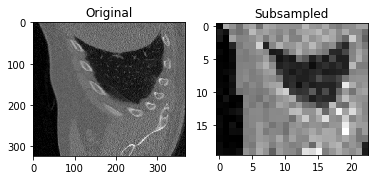

In [18]:
# Plot the original image
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
ax.imshow(sitk.GetArrayFromImage(image[32,:,:]), cmap='gray')
ax.set_title('Original')

# Brute force sub-sample
image_subsampled = image[32,::16,::16]
ax = fig.add_subplot(1, 2, 2)
ax.imshow(sitk.GetArrayFromImage(image_subsampled), cmap='gray')
ax.set_title('Subsampled')

We can take a 2D slice of a 3D image for visualization.

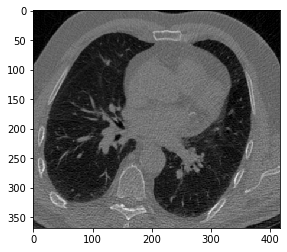

In [19]:
plt.imshow(sitk.GetArrayFromImage(image[:,:,150]), cmap='gray')

## Exercises

### Exercise 1: Image addition and physical space

ITK does not allow pixel-based addition of images when they do not occupy the same location in physical space.

Uncomment the addition operation below, and observe the error that occurs.

Comment the `SetOrigin`, `SetSpacing`, and `SetDirection` lines.  Does the error go away? Why? Can any of these attributes be modified and addition still occur?

In [20]:
image_a = sitk.Image(24, 24, sitk.sitkUInt8)
image_a[0,0] = 2

image_b = sitk.Image(image_a.GetSize(), sitk.sitkUInt8)
image_b.SetDirection([0, 1, 0.5, 0.5])
image_b.SetSpacing([0.5, 0.8])
image_b.SetOrigin([10.0, 20.0])
image_b[0,0] = 3

image_c = sitk.Add(image_a, image_b)
print(image_c[0,0])

RuntimeError: Exception thrown in SimpleITK Add: /tmp/SimpleITK-build/ITK-prefix/include/ITK-4.13/itkImageToImageFilter.hxx:241:
itk::ERROR: AddImageFilter(0x1e4fde0): Inputs do not occupy the same physical space! 
InputImage Origin: [0.0000000e+00, 0.0000000e+00], InputImage_1 Origin: [1.0000000e+01, 2.0000000e+01]
	Tolerance: 1.0000000e-06
InputImage Spacing: [1.0000000e+00, 1.0000000e+00], InputImage_1 Spacing: [5.0000000e-01, 8.0000000e-01]
	Tolerance: 1.0000000e-06
InputImage Direction: 1.0000000e+00 0.0000000e+00
0.0000000e+00 1.0000000e+00
, InputImage_1 Direction: 0.0000000e+00 1.0000000e+00
5.0000000e-01 5.0000000e-01

	Tolerance: 1.0000000e-06


### Exercise 2: Image physical extent

In the figure below, two images are plotted at their physical location in space.

By changing the *Origin* and *Spacing* of the image *b* only, make them occupy the same area in physical space.

*Hint*: The length of an image with spacing, $\Delta x$ and size $n$ is $n \Delta x$. For two lengths to be the same, $\Delta x_1 (n_1 - 1) = \Delta x_2 (n_2  - 1)$.

In [21]:
def show_in_physical_space(image, column):
    fig = plt.figure()
    ax = fig.add_subplot(2, 2, column)
    first_index = (0, 0)
    left, bottom = image.TransformIndexToPhysicalPoint(first_index)
    size = image.GetSize()
    # Since indexes count from zero, we must subtract 1
    last_index = (size[0] - 1, size[1] - 1)
    right, top = image.TransformIndexToPhysicalPoint(last_index)
    extent = (left, right, bottom, top)
    print('extent', extent)
    ax.imshow(sitk.GetArrayFromImage(image), extent=extent)
    ax.set_xlim(0.0, 100.0)
    ax.set_ylim(0.0, 100.0)
    plt.show()

extent (0.0, 76.0, 0.0, 38.0)


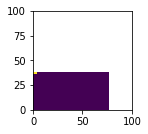

extent (0.0, 38.0, 0.0, 19.0)


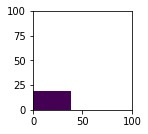

In [22]:
image_a = sitk.Image(20, 20, sitk.sitkUInt8)
#image_a.SetOrigin([10.0, 20.0])
image_a.SetSpacing([4.0, 2.0])
image_a[0,0] = 100
show_in_physical_space(image_a, 1)

image_b = sitk.Image(20, 20, sitk.sitkUInt8)
#image_b.SetOrigin([5.0, 5.0])
image_b.SetSpacing([2.0, 1.0])

show_in_physical_space(image_b, 2)

# Resampling Images

In [23]:
image.GetSize()

(418, 368, 323)

Create a resampler.

In [24]:
resampler = sitk.ResampleImageFilter()

What are the options that can be set on the `resampler`?

In [25]:
# Uncomment the line below and place the cursor after the "t" in "Set"
# Then, press the TAB key.
#resampler.Set

We can either set use a *reference image* to determine the output image pixel sampling grid, or we can set desired output image information manually.

Here we will make the output image size half of the input image size in each direction.

In [26]:
origin = image.GetOrigin()
resampler.SetOutputOrigin(origin)

direction = image.GetDirection()
resampler.SetOutputDirection(direction)

spacing = image.GetSpacing()
resampler.SetOutputSpacing(spacing)

size = list(image.GetSize())
size[0] = int(size[0] / 2)
size[1] = int(size[1] / 2)
resampler.SetSize(size)
print(size)

[209, 184, 323]


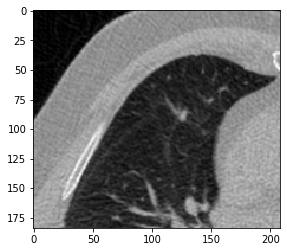

In [27]:
resampled_image = resampler.Execute(image)
plt.imshow(sitk.GetArrayFromImage(resampled_image[:,:,150]), cmap='gray')

We can also apply a spatial transform in the resampling process.

In [28]:
dimension = 3
translation = (-10.0, -20.0, 0.0)
transform = sitk.TranslationTransform(dimension, translation)
resampler.SetTransform(transform)

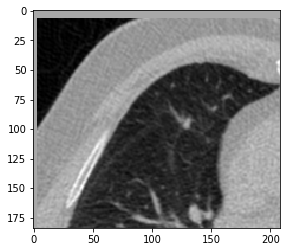

In [29]:
resampled_image = resampler.Execute(image)
plt.imshow(sitk.GetArrayFromImage(resampled_image[:,:,150]), cmap='gray')

When the input image is sampled outside of its domain, a *default pixel value* is returned.

In [30]:
resampler.SetDefaultPixelValue(150)

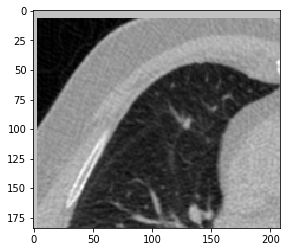

In [31]:
resampled_image = resampler.Execute(image)
plt.imshow(sitk.GetArrayFromImage(resampled_image[:,:,150]), cmap='gray')

Finally, we can also change the interpolator used.  The default is a bi-linear interpolator for 2D images and a tri-linear interpolator for 3D images.

In [32]:
resampler.SetInterpolator(sitk.sitkNearestNeighbor)

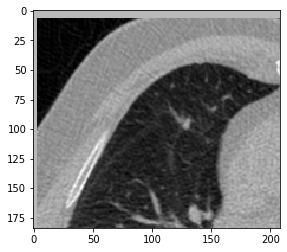

In [33]:
resampled_image = resampler.Execute(image)
plt.imshow(sitk.GetArrayFromImage(resampled_image[:,:,150]), cmap='gray')

## Exercises

### Exercise 1: Windowed Sinc

Run the `resampler` with the `sitk.sitkWelchWindowedSinc` interpolator.  What is different?

# Spatial Transformations

In [34]:
import SimpleITK as sitk
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Tutorial

A number of different spatial transforms are available in SimpleITK.

The simplest is the Identity Transform.  This transform simply returns input points unaltered.

In [35]:
dimension = 2

print('*Identity Transform*')
identity = sitk.Transform(dimension, sitk.sitkIdentity)
print('Dimension: ' + str(identity.GetDimension()))

# Points are always defined in physical space
point = (1.0, 1.0)
def transform_point(transform, point):
    transformed_point = transform.TransformPoint(point)
    print('Point ' + str(point) + ' transformed is ' + str(transformed_point))

transform_point(identity, point)

*Identity Transform*
Dimension: 2
Point (1.0, 1.0) transformed is (1.0, 1.0)


For the TranslationTransform, the Parameters are the values of the translation Offset.

In [36]:
print('*Translation Transform*')
translation = sitk.TranslationTransform(dimension)

print('Parameters: ' + str(translation.GetParameters()))
print('Offset:     ' + str(translation.GetOffset()))
print('FixedParameters: ' + str(translation.GetFixedParameters()))
transform_point(translation, point)

print('')
translation.SetParameters((3.1, 4.4))
print('Parameters: ' + str(translation.GetParameters()))
transform_point(translation, point)

*Translation Transform*
Parameters: (0.0, 0.0)
Offset:     (0.0, 0.0)
FixedParameters: ()
Point (1.0, 1.0) transformed is (1.0, 1.0)

Parameters: (3.1, 4.4)
Point (1.0, 1.0) transformed is (4.1, 5.4)


The affine transform is capable of representing translations, rotations, shearing, and scaling.

In [37]:
print('*Affine Transform*')
affine = sitk.AffineTransform(dimension)

print('Parameters: ' + str(affine.GetParameters()))
print('FixedParameters: ' + str(affine.GetFixedParameters()))
transform_point(affine, point)

print('')
affine.SetTranslation((3.1, 4.4))
print('Parameters: ' + str(affine.GetParameters()))
transform_point(affine, point)

*Affine Transform*
Parameters: (1.0, 0.0, 0.0, 1.0, 0.0, 0.0)
FixedParameters: (0.0, 0.0)
Point (1.0, 1.0) transformed is (1.0, 1.0)

Parameters: (1.0, 0.0, 0.0, 1.0, 3.1, 4.4)
Point (1.0, 1.0) transformed is (4.1, 5.4)


### Applying Transforms to Images

Create a function to display the images that is aware of image spacing.

In [38]:
image = sitk.ReadImage('data/01_Fixed.mhd')

In [39]:
#rotation_center = (image.GetSize()[0]/2, image.GetSize()[1]/2, image.GetSize()[2]/2)
rotation_center = (image.GetSpacing()[0]*image.GetSize()[0]/2, image.GetSpacing()[1]*image.GetSize()[1]/2, image.GetSpacing()[2]*image.GetSize()[2]/2)
theta_x = 0.0
theta_y = 0.0
theta_z = np.pi/4.0
translation = (0,0,0)

rigid_euler = sitk.Euler3DTransform(rotation_center, theta_x, theta_y, theta_z, translation)

image2 = sitk.Resample(image,rigid_euler, sitk.sitkLinear)

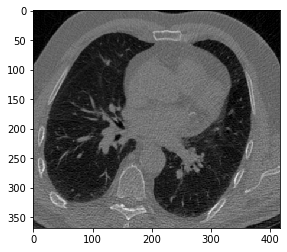

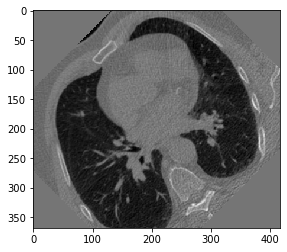

In [40]:
plt.imshow(sitk.GetArrayFromImage(image[:,:,150]), cmap='gray')
plt.show()
plt.imshow(sitk.GetArrayFromImage(image2[:,:,150]), cmap='gray')
plt.show()

## Exercise

### Exercise 1: Transform complexity

Below is a list of transforms supported, ordered by their complexity. Choose three, and compare how many Parameters they have.


<table width="100%">
<tr><td><a href="http://www.itk.org/Doxygen/html/classitk_1_1TranslationTransform.html">TranslationTransform</a></td><td>2D or 3D, translation</td></tr>
  <tr><td><a href="http://www.itk.org/Doxygen/html/classitk_1_1VersorTransform.html">VersorTransform</a></td><td>3D, rotation represented by a versor</td></tr>
  <tr><td><a href="http://www.itk.org/Doxygen/html/classitk_1_1VersorRigid3DTransform.html">VersorRigid3DTransform</a></td><td>3D, rigid transformation with rotation represented by a versor</td></tr>
  <tr><td><a href="http://www.itk.org/Doxygen/html/classitk_1_1Euler2DTransform.html">Euler2DTransform</a></td><td>2D, rigid transformation with rotation represented by a Euler angle</td></tr>
  <tr><td><a href="http://www.itk.org/Doxygen/html/classitk_1_1Euler3DTransform.html">Euler3DTransform</a></td><td>3D, rigid transformation with rotation represented by Euler angles</td></tr>
  <tr><td><a href="http://www.itk.org/Doxygen/html/classitk_1_1Similarity2DTransform.html">Similarity2DTransform</a></td><td>2D, composition of isotropic scaling and rigid transformation with rotation represented by a Euler angle</td></tr>
  <tr><td><a href="http://www.itk.org/Doxygen/html/classitk_1_1Similarity3DTransform.html">Similarity3DTransform</a></td><td>3D, composition of isotropic scaling and rigid transformation with rotation represented by a versor</td></tr>
  <tr><td><a href="http://www.itk.org/Doxygen/html/classitk_1_1ScaleTransform.html">ScaleTransform</a></td><td>2D or 3D, anisotropic scaling</td></tr>
  <tr><td><a href="http://www.itk.org/Doxygen/html/classitk_1_1ScaleVersor3DTransform.html">ScaleVersor3DTransform</a></td><td>3D, rigid transformation and anisotropic scale is <bf>added</bf> to the rotation matrix part (not composed as one would expect)</td></tr>
  <tr><td><a href="http://www.itk.org/Doxygen/html/classitk_1_1ScaleSkewVersor3DTransform.html">ScaleSkewVersor3DTransform</a></td><td>3D, rigid transformation with anisotropic scale and skew matrices <bf>added</bf> to the rotation matrix part (not composed as one would expect)</td></tr>
  <tr><td><a href="http://www.itk.org/Doxygen/html/classitk_1_1AffineTransform.html">AffineTransform</a></td><td>2D or 3D, affine transformation.</td></tr>
  <tr><td><a href="http://www.itk.org/Doxygen/html/classitk_1_1BSplineTransform.html">BSplineTransform</a></td><td>2D or 3D, deformable transformation represented by a sparse regular grid of control points. </td></tr>
  <tr><td><a href="http://www.itk.org/Doxygen/html/classitk_1_1DisplacementFieldTransform.html">DisplacementFieldTransform</a></td><td>2D or 3D, deformable transformation represented as a dense regular grid of vectors.</td></tr>
  <tr><td><a href="http://www.itk.org/SimpleITKDoxygen/html/classitk_1_1simple_1_1Transform.html">Transform</a></td>
  <td>A generic transformation. Can represent any of the SimpleITK transformations, and a <b>composite transformation</b> (stack of transformations concatenated via composition, last added, first applied). </td></tr>
  </table>

## Exercise 2: Image Registration

Perform rigid registration of data/01_Moving.mhd onto data/01_Fixed.mhd using the MattesMutualInformation criteria.

## Interfacing with scikit-image:

In [41]:
import skimage.io

In [42]:
img = skimage.io.imread('data/01_Fixed.mhd', plugin='simpleitk')

In [43]:
print(img.shape, img.dtype, type(img))

(323, 368, 418) int16 <class 'numpy.ndarray'>


## PyDicom

In [45]:
import pydicom as dicom
import skimage.io
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import os, sys, glob
from skimage.draw import polygon

In [46]:
INPUT_FOLDER = 'data'

In [47]:
patients = [os.path.join(INPUT_FOLDER, name) for name in os.listdir(INPUT_FOLDER) if os.path.isdir(os.path.join(INPUT_FOLDER, name))]
patients.sort()

In [48]:
patient = patients[0]

In [49]:
def load_scan(path):
    slices = [dicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: float(x.ImagePositionPatient[2]))
    try:
        slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2])
    except:
        slice_thickness = np.abs(slices[0].SliceLocation - slices[1].SliceLocation)
        
    for s in slices:
        s.SliceThickness = slice_thickness
        
    return slices

def normalize_array(image, MIN_BOUND=-1000.0, MAX_BOUND=400.0):
    image = (image - MIN_BOUND) / (MAX_BOUND - MIN_BOUND)
    image[image>1] = 1.
    image[image<0] = 0.
    return image


data/patient_1
Patient ID :   121
int16


/home/avideep/.local/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: data.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


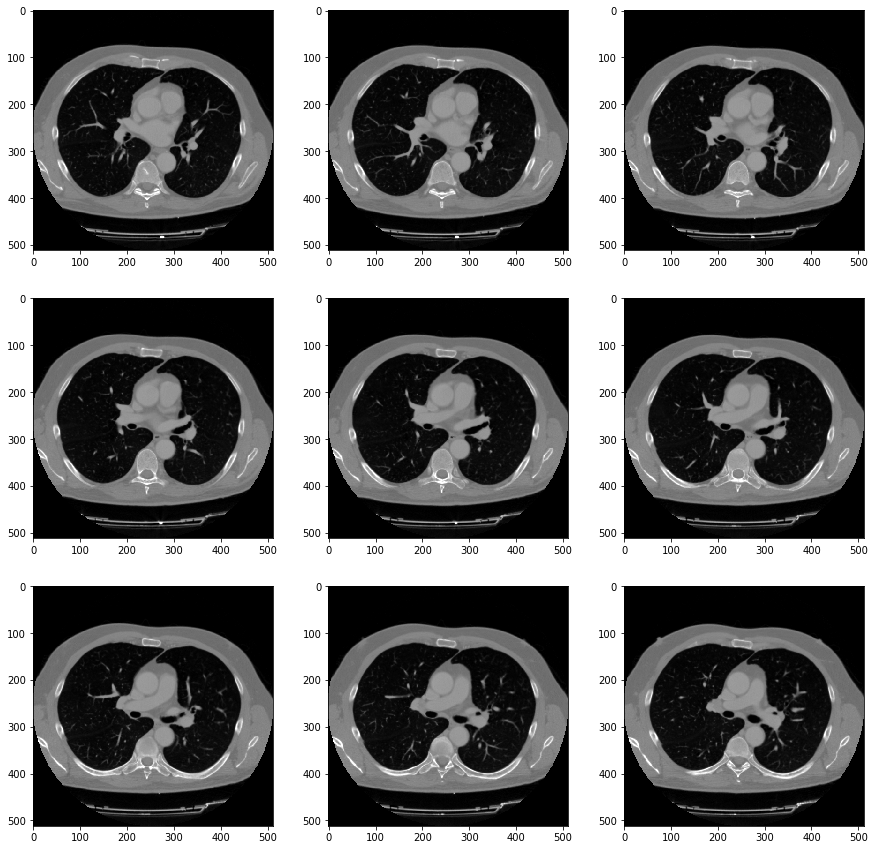

In [50]:

print(patient)
for subdir, dirs, files in os.walk(patient):
    dcms = glob.glob(os.path.join(subdir, "*.dcm"))
    slices = [dicom.read_file(dcm) for dcm in dcms]

pat_id = slices[0].PatientID        
print("Patient ID : ",pat_id, len(slices))
slices.sort(key = lambda x: float(x.ImagePositionPatient[2]))
image = np.stack([s.pixel_array for s in slices], axis=-1)

print(image.dtype)
image = image.astype(np.int16)
image = image* slices[0].RescaleSlope + slices[0].RescaleIntercept

image = np.swapaxes(image,0,2)
image = np.swapaxes(image,1,2)
skimage.io.imsave(INPUT_FOLDER+pat_id+'.tiff', image.astype(np.int16), plugin='tifffile', compress = 1)

# Plot to check slices, for example 50 to 59
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image[ i + 64, ...], cmap="gray",label="%d"%(i+64) )
plt.show()